In [4]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

path = kagglehub.dataset_download("ajaypalsinghlo/world-happiness-report-2024", path = 'WHR2024.csv')
df = pd.read_csv(path)
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [5]:
# Check null cols
df.columns[df.isna().any()].tolist()

['Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

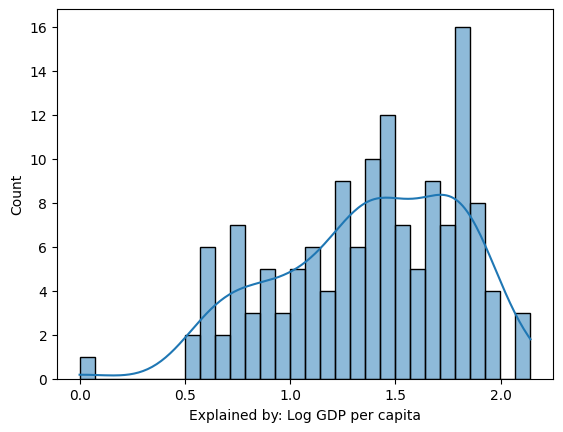

In [6]:
sns.histplot(df['Explained by: Log GDP per capita'], bins = 30, kde = True)
plt.show()

In [7]:
# Task: Compute Pearson and Spearman correlation between happiness score and GDP per capita (World Happiness Report dataset).

In [16]:
# Clean Explained by: Log GDP per capita field first (replace by median)
df['Explained by: Log GDP per capita'] = df['Explained by: Log GDP per capita'].fillna(df['Explained by: Log GDP per capita'].median())

# Remove all null cells (only 3 rows will be affected)
df.dropna(inplace=True)

In [17]:
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


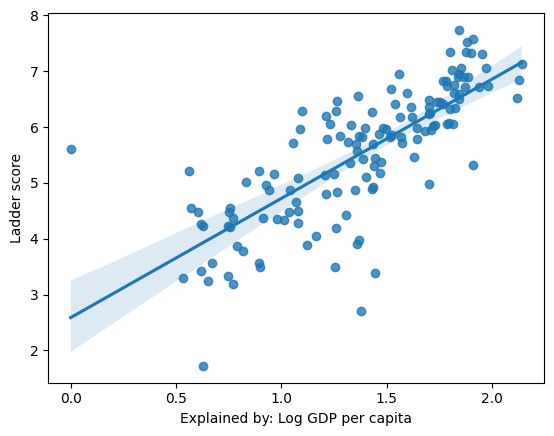

In [21]:
# Lets visualise scatter plot between score & GDP to see if any real differences are there

sns.regplot(x = 'Explained by: Log GDP per capita', y = 'Ladder score', data = df)
plt.show()

# Generally the trend suggests: lower GDP -> lower happiness levels
# But lets verify this using person and spearman methods

In [24]:
# Pearson method
stat, p_val = stats.pearsonr(df['Explained by: Log GDP per capita'], df['Ladder score'])
print(stat) # Close to 1, better
print(p_val) # Close to 0.05 we can reject our Null Hypo.

# As the results also suggest, that there is a strong relationship in between hapiness-score and GDP

0.7685036824504893
1.519836350733749e-28


In [25]:
# Spearman method
res = stats.spearmanr(df['Explained by: Log GDP per capita'], df['Ladder score'])
res

SignificanceResult(statistic=np.float64(0.8245253993272078), pvalue=np.float64(6.076995348254691e-36))

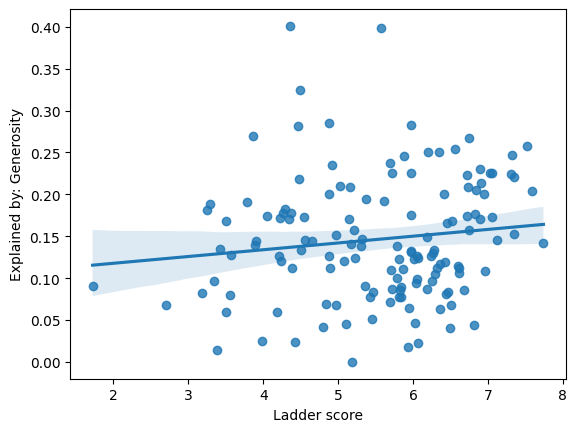

In [30]:
# Task: See if in places with more hapiness socre, people are more generous

sns.regplot(x = 'Ladder score', y = 'Explained by: Generosity', data = df)
plt.show()

# By looking at it initially there seems no hard relationship between these 2 vars.

In [31]:
# Task: Check if there is a strong correlation between life expectancy and social support

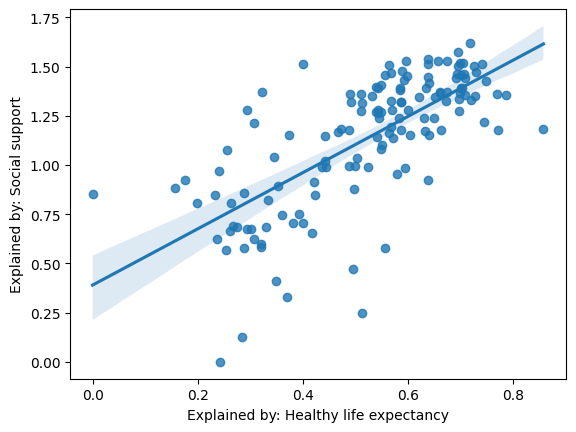

In [32]:
sns.regplot(x = 'Explained by: Healthy life expectancy', y = 'Explained by: Social support', data = df)
plt.show()

In [34]:
# By the looks of chart, we can say yes. But lets verify using spearman method

res = stats.spearmanr(df['Explained by: Healthy life expectancy'], df['Explained by: Social support'])
res

# Yes these values suggest that life expec. is higher in places where social support is higher

SignificanceResult(statistic=np.float64(0.7255922683595121), pvalue=np.float64(3.6800729592841905e-24))